<a href="https://colab.research.google.com/github/SujitbMusale/Boston-Housing-Linear-Regression/blob/main/Boston_Housing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:-

## The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. 

The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.

In [35]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np


In [36]:
#Loading DataSet
Boston = pd.read_csv('/content/drive/MyDrive/almabetter/csv files/Boston.csv')

In [37]:
#lets check the columns avialbel in the dataset
Boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [38]:
# lets check the shape of the dataset
print('Number of Rows are ',Boston.shape[0])
print('Number of Columns are ',Boston.shape[1])

Number of Rows are  506
Number of Columns are  17


In [39]:
# here MEDV is our target column
# drop the 'Unnamed: 15','Unnamed: 16' and 'CAT. MEDV' because we are not going to consideration in our study
Boston.drop(['Unnamed: 15','Unnamed: 16','CAT. MEDV'],inplace = True, axis=1)

In [40]:
# check the dataset columns
Boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [41]:
# lets check the null value present inside the dataset
null_check = pd.DataFrame(Boston.isnull().sum(), columns=['count'])

In [42]:
print(null_check)

         count
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0


From Above 'Null Check' we can see that our dataset is free from null values and hence we dont have to work on null values

In [43]:
# lets check the statics of the data set
Boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Here We are having min values for 'ZEN' and 'CHAS' as Zero And that are Ok 
Also the Max values are aslo in expected range and count shows no null value present in our data set

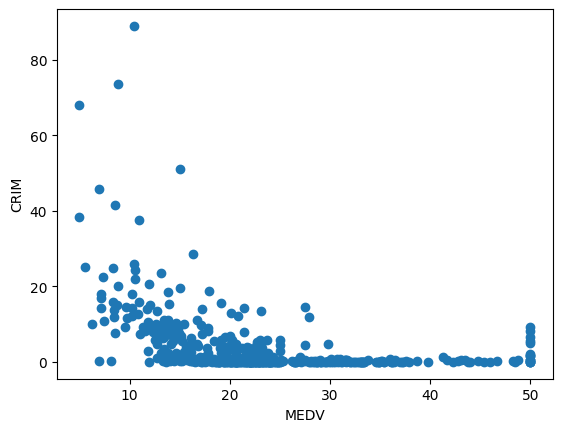

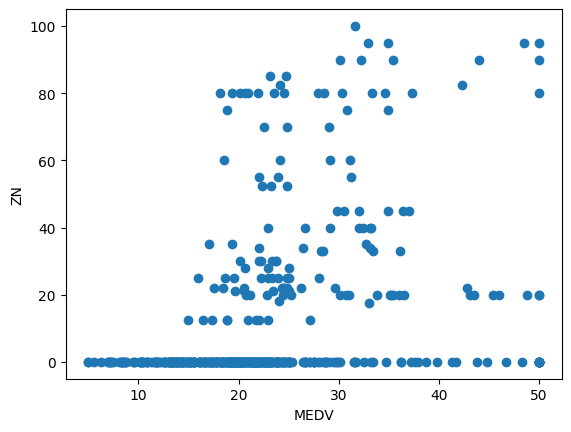

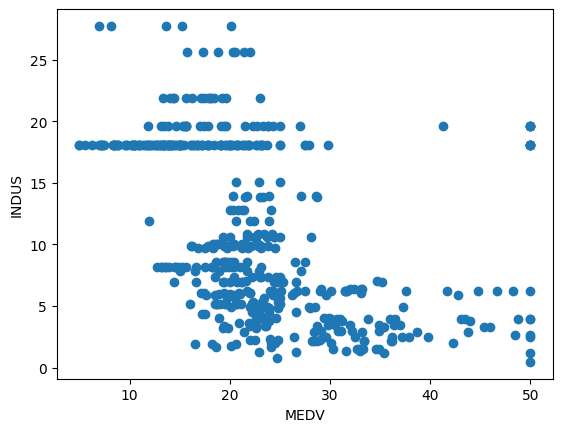

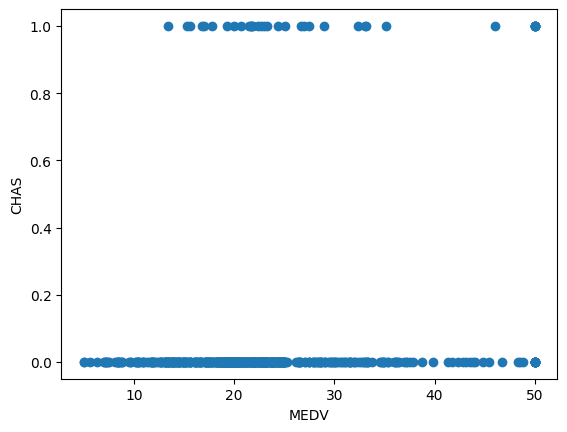

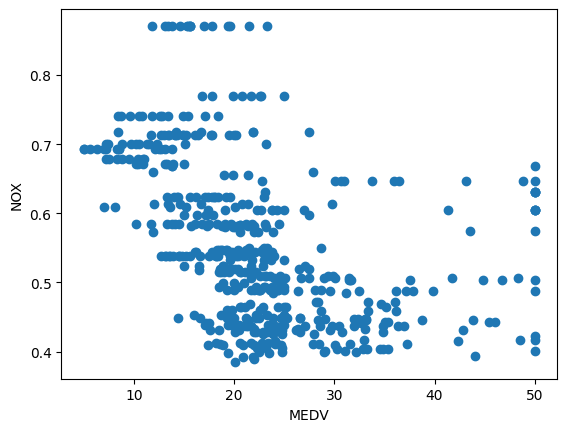

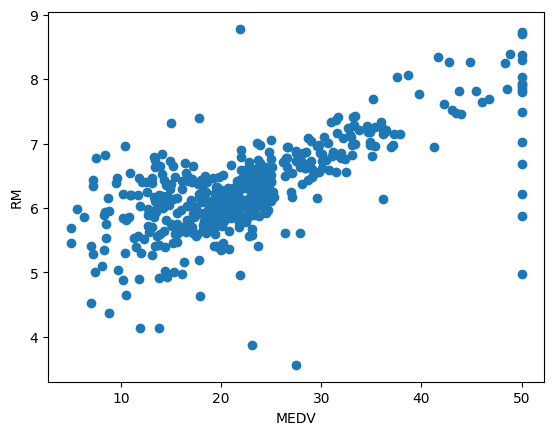

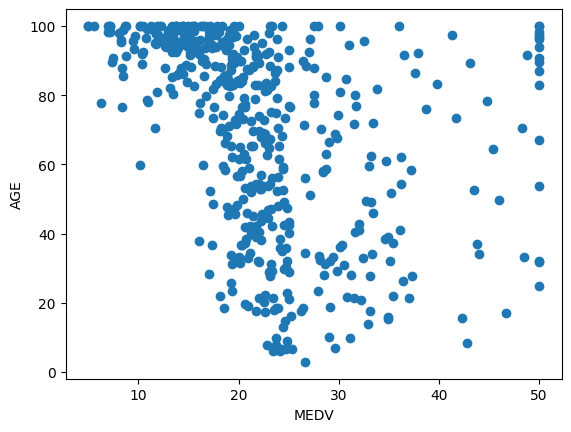

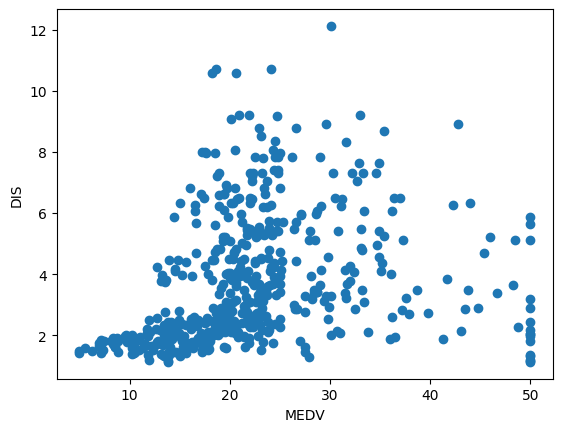

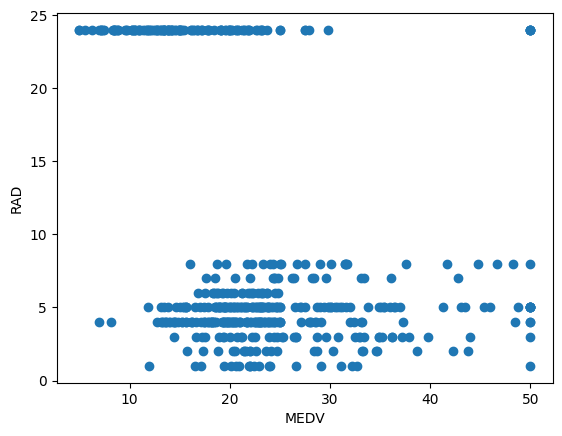

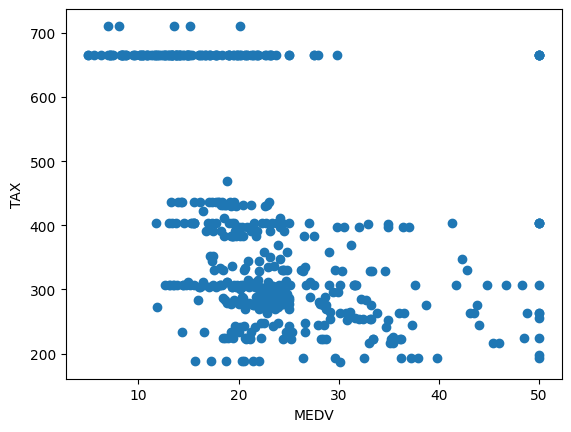

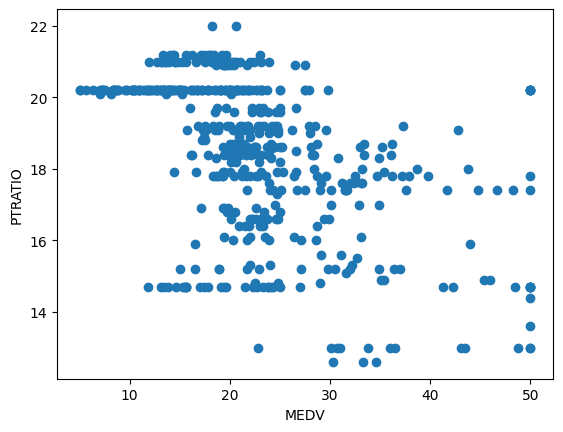

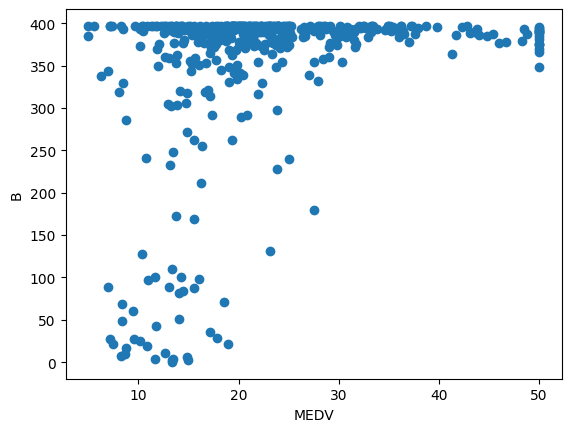

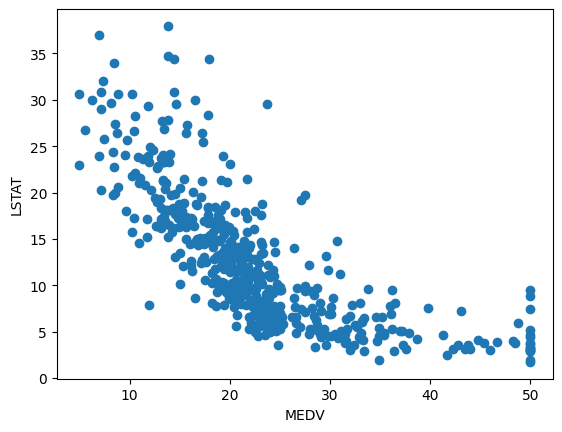

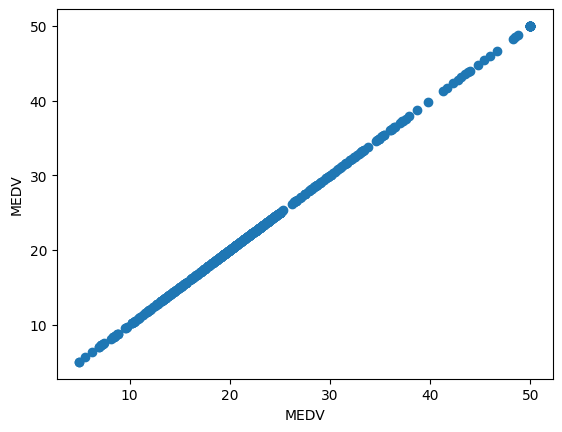

In [44]:
# lets Plot the Scatter Plot for Independent variable to Know the distribution of their data
for i in Boston.columns:
  plt.scatter(Boston['MEDV'],Boston[i])
  plt.xlabel('MEDV')
  plt.ylabel(i)
  plt.show()

From above scatter plot we can clearly see that the variables 'CHAS' is a Categorical Variable.

In [45]:
# also check the unique categories in RAD
print(Boston['RAD'].unique())

[ 1  2  3  5  4  8  6  7 24]


In [46]:
# lets check the unique present in the 'RAD' Varaible
for i in Boston.columns:
  print(f'Number of Unique Element in the Feature {i} are : {len(Boston[i].unique())}')

Number of Unique Element in the Feature CRIM are : 504
Number of Unique Element in the Feature ZN are : 26
Number of Unique Element in the Feature INDUS are : 76
Number of Unique Element in the Feature CHAS are : 2
Number of Unique Element in the Feature NOX are : 81
Number of Unique Element in the Feature RM are : 446
Number of Unique Element in the Feature AGE are : 356
Number of Unique Element in the Feature DIS are : 412
Number of Unique Element in the Feature RAD are : 9
Number of Unique Element in the Feature TAX are : 66
Number of Unique Element in the Feature PTRATIO are : 46
Number of Unique Element in the Feature B are : 357
Number of Unique Element in the Feature LSTAT are : 455
Number of Unique Element in the Feature MEDV are : 229


From above analysis we can see that 'CHAS' are clearly having binary class so we consider as Categorical Variable and also 'RAD' is having 9 unique class but till we consider as a numerical variable.

In [47]:
# We Are going for Univariate analysis
# lets categerize Numerical and categorical variable
Numerical_Variable = Boston.drop(['CHAS'],axis=1)
Categorical_Variable = Boston['CHAS']

In [48]:
Numerical_Variable.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


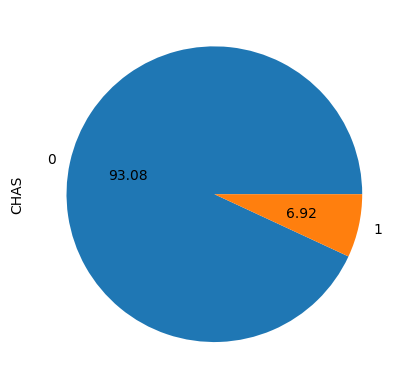

In [49]:
## lets check the categorical variable with pie chart
Categorical_Variable.value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

From above pie chart we can see that the only 6.92 % of out put are 1 and rest of the data is having 0 as variable.

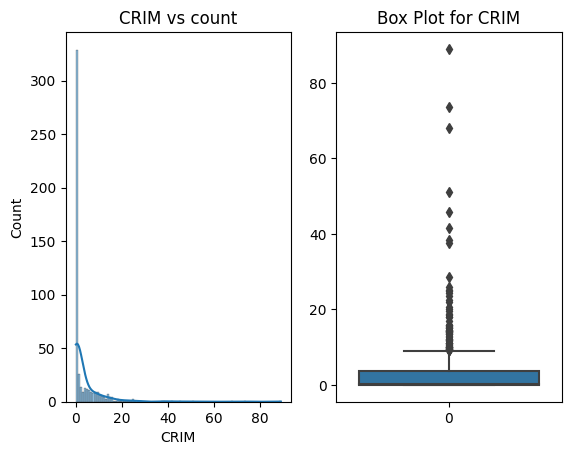

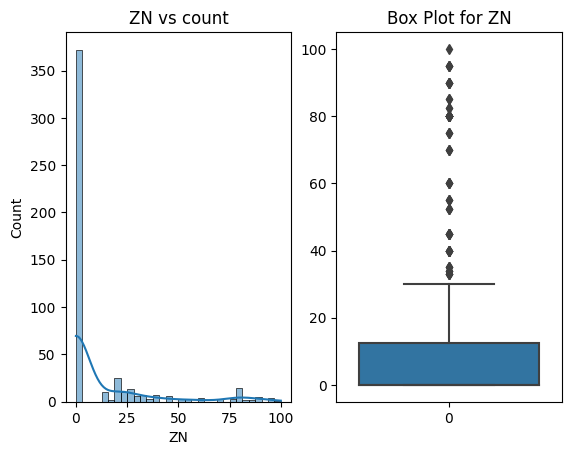

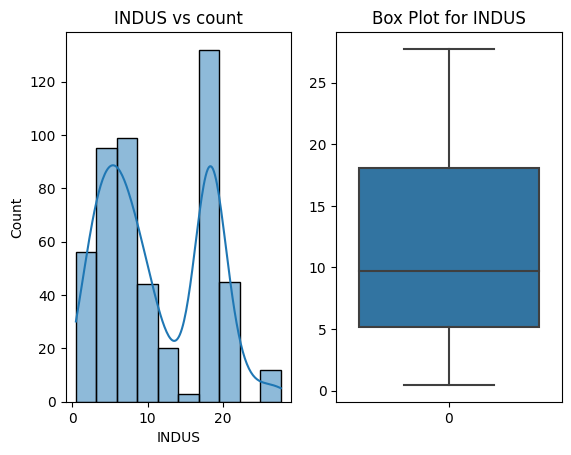

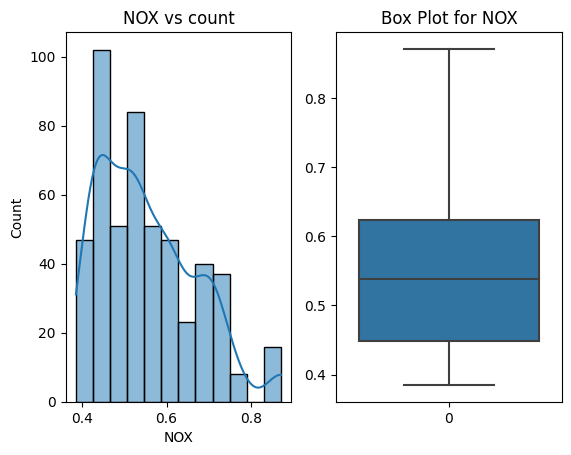

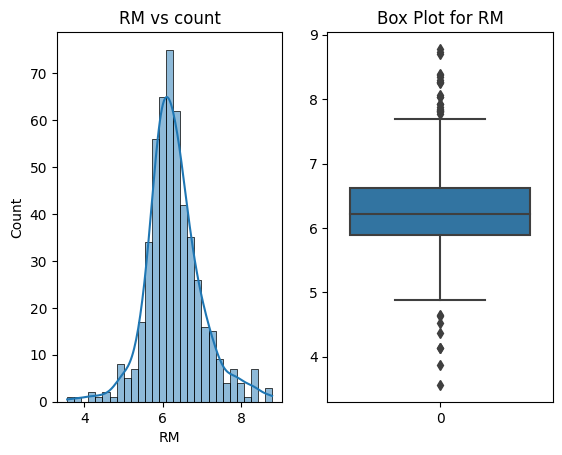

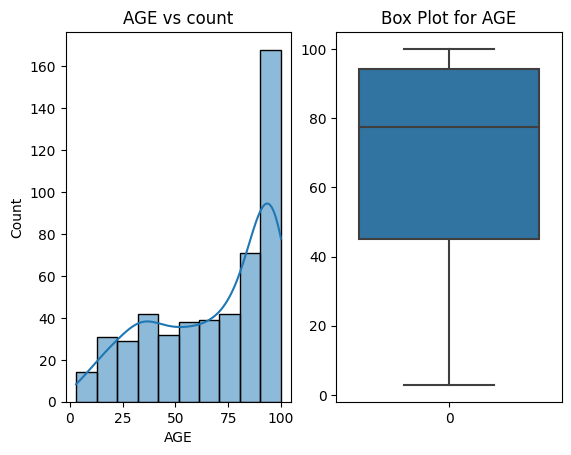

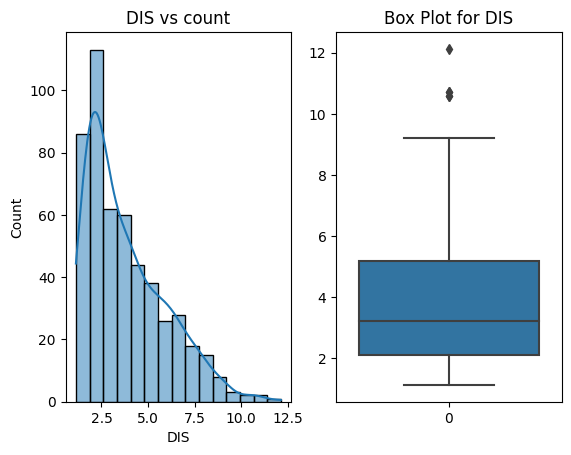

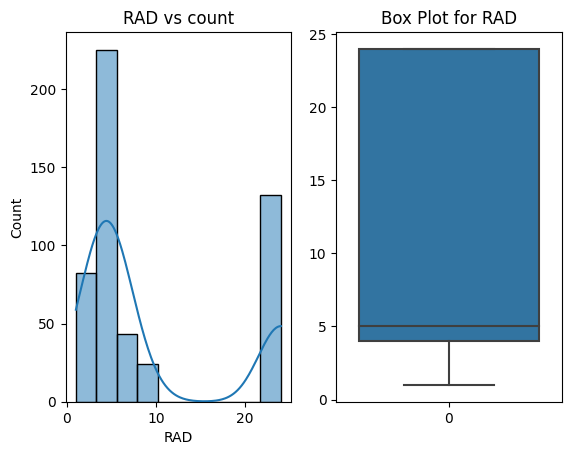

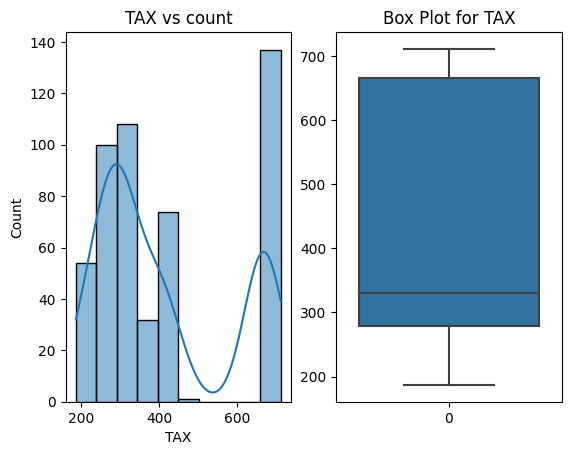

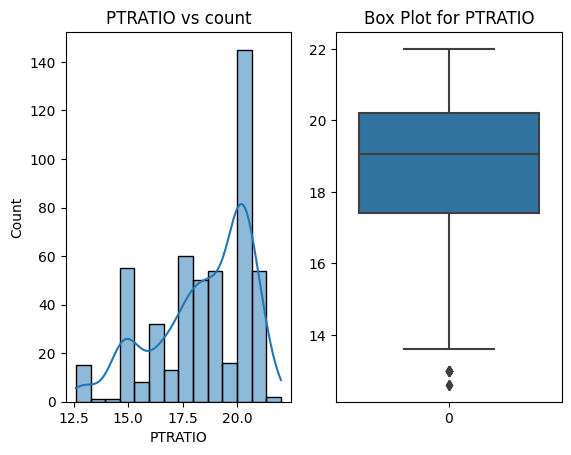

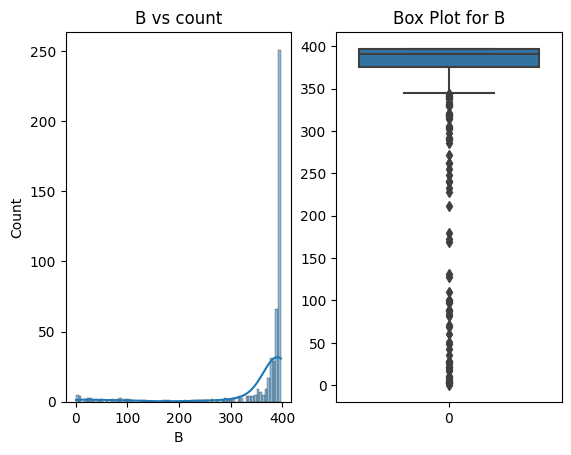

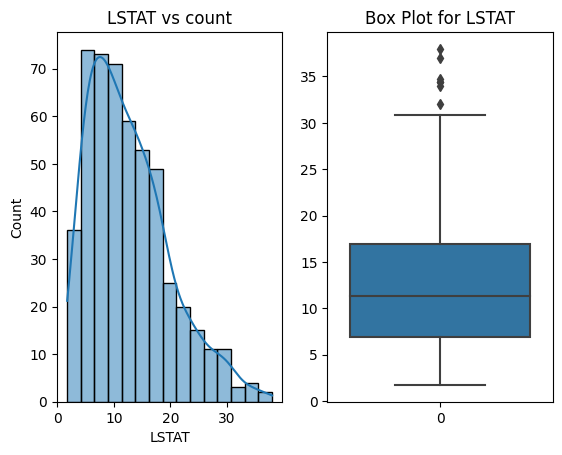

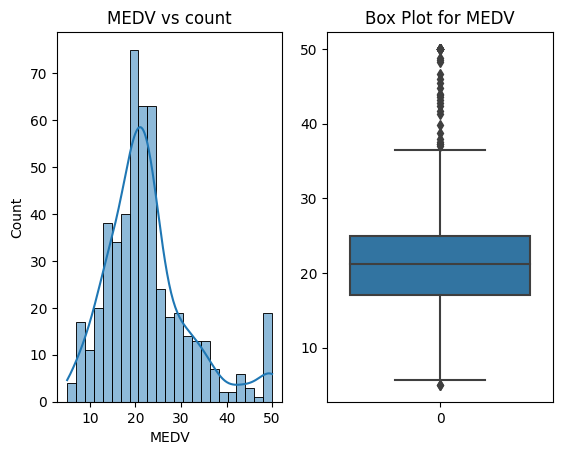

In [50]:
# let's do some exploration with numerical data
# plot histogram for Numerical Data
for i in Numerical_Variable.columns:
  print('\n')
  plt.subplot(1,2,1)
  sns.histplot(Numerical_Variable[i],kde = True)
  plt.xlabel(i)
  plt.title(f'{i} vs count')
  plt.ylabel('Count')

  plt.subplot(1,2,2)
  sns.boxplot(Numerical_Variable[i])
  plt.title(f'Box Plot for {i}')
  plt.show()
  

From above plot we can see that most of the Indepenedent variables  are Normaly distributed and also the Dependent variable 'MEDV' Is also look normaly distributed 

Most of the variables are having outliers present.

In [51]:
# lets plot the correlaton matrix for the given dataset
correlation_matrix =Boston.corr()

In [52]:
# lets start machine learning after the EDA.
# split data in Independent and dependent variables
X=Boston.drop('MEDV',axis=1)
Y=Boston['MEDV']

In [53]:
# lets check the shape of Independent and dependent Variable
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [54]:
# split data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [55]:
# lets check the split shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [56]:
# create the LinerRegression Object
lr= LinearRegression()

In [57]:
# fit data to linerregression and create model
model = lr.fit(X_train,y_train)

In [58]:
y_pred = model.predict(X_test)

In [59]:
#prin MAE,MSE,R-squred error
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('R-squred-error: ',metrics.r2_score(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  3.7163105674367594
MSE:  30.54104916763426
R-squred-error:  0.6878629975283388
RMSE:  5.526395675993012


<ipython-input-60-eb0510beaacc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred))


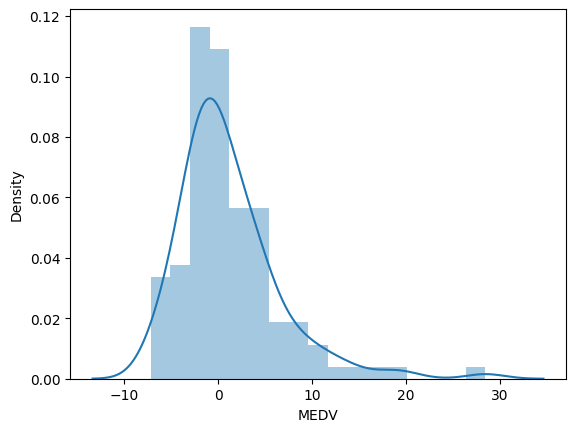

In [60]:
sns.distplot((y_test-y_pred))
plt.show()

From above graph we can see that the error between predicted and actual data points are normaly distributed

<Axes: >

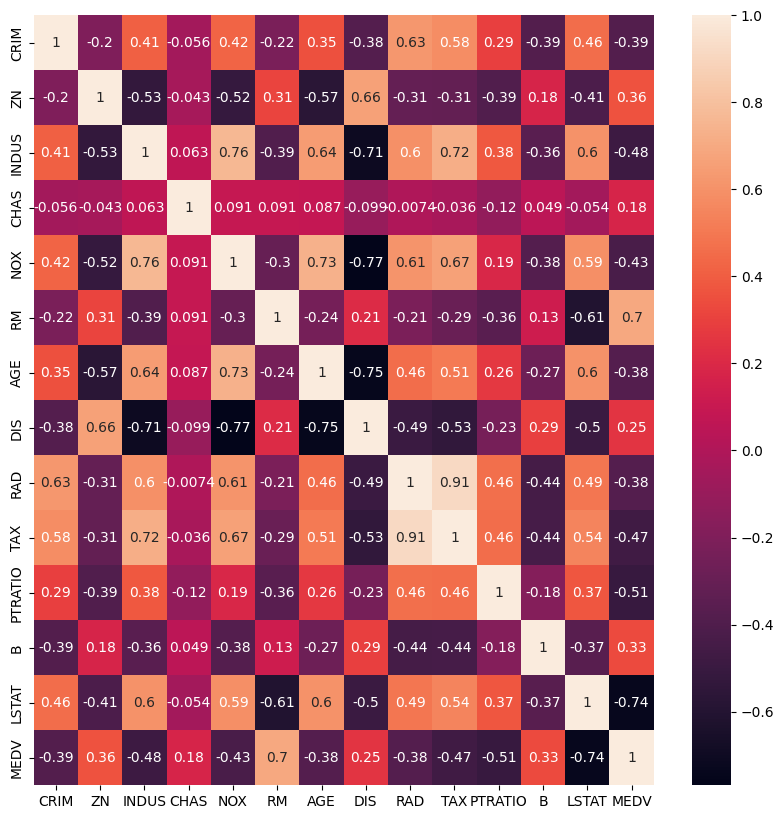

In [68]:
# print the correlation matrix and heatmap
plt.figure(figsize=(10,10))
correlation_matrix =Boston.corr()
sns.heatmap(data=correlation_matrix,annot=True)

In [61]:
# lets see the coefficient for various variabels
coefficients = pd.DataFrame(lr.coef_,X_train.columns,columns=['Coeff'])

In [62]:
print(coefficients)

             Coeff
CRIM     -0.101385
ZN        0.041518
INDUS    -0.026843
CHAS      2.046746
NOX     -18.738063
RM        3.976272
AGE      -0.007868
DIS      -1.501231
RAD       0.242486
TAX      -0.010656
PTRATIO  -0.901206
B         0.009443
LSTAT    -0.434681


In [76]:
print('Estimated intercept coefficent: ',lr.intercept_)

Estimated intercept coefficent:  34.73253203932185
